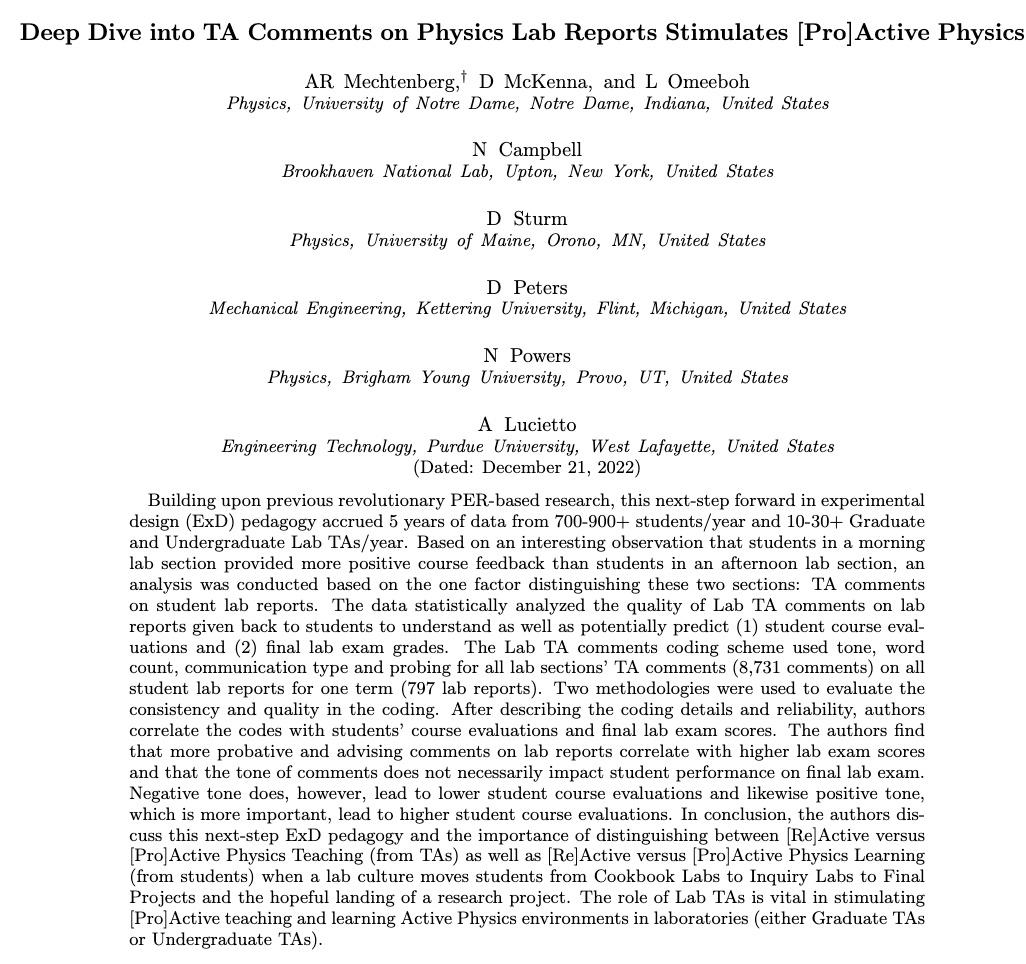

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 255 (delta 121), reused 122 (delta 47), pack-reused 9 (from 1)
Receiving objects: 100% (255/255), 19.57 MiB | 12.00 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [3]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [4]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [22]:
# Data for a single PreMed Lab term with 8,731 comments on 797 lab reports by Lab TAs.
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

Physics 2 - Section: 27
Physics 2 - Section: 28


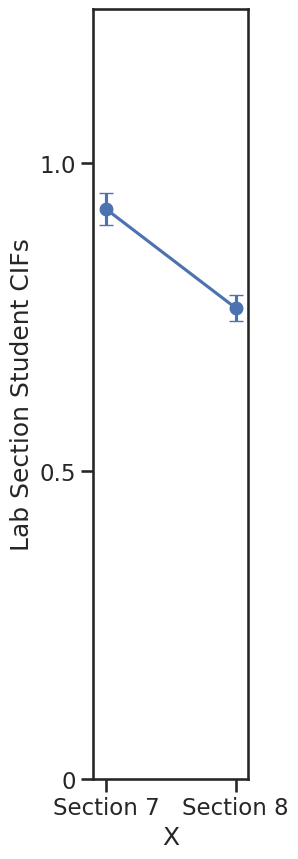

In [16]:
import matplotlib.pyplot as plt

print('Physics 2 - Section:',data_group2_df['Section'][8])
print('Physics 2 - Section:',data_group2_df['Section'][9])

# Data points
x = [data_group2_df['Section'][8], data_group2_df['Section'][9]]
y = [data_group2_df['CIF'][8], data_group2_df['CIF'][9]]

# Error bars
yerr = [data_group2_df['CIF_STERR'][8], data_group2_df['CIF_STERR'][9]]
#yerr = [data_group2_df['CIF_STDEV'][8], data_group2_df['CIF_STDEV'][9]]

# Create the plot
plt.figure(figsize=(2,10))
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Lab Section Student CIFs')
plt.xlim(26.9, 28.1)
plt.xticks([27,28], ['Section 7', 'Section 8'])
plt.yticks([0,0.5,1], ['0', '0.5', '1.0'])
plt.ylim(0, 1.25)

# Show the plot
plt.show()

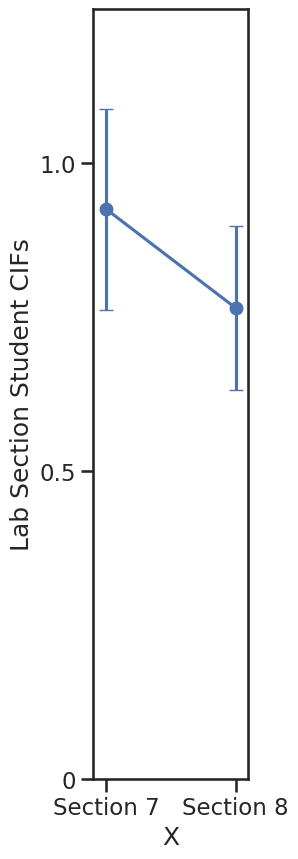

In [36]:
# Data points
x = [data_group2_df['Section'][8], data_group2_df['Section'][9]]
y = [data_group2_df['CIF'][8], data_group2_df['CIF'][9]]

# Error bars
#yerr = [data_group2_df['CIF_STERR'][8], data_group2_df['CIF_STERR'][9]]
yerr = [data_group2_df['CIF_STDEV'][8], data_group2_df['CIF_STDEV'][9]]

# Create the plot
plt.figure(figsize=(2,10))
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Lab Section Student CIFs')
plt.xlim(26.9, 28.1)
plt.xticks([27,28], ['Section 7', 'Section 8'])
plt.yticks([0,0.5,1], ['0', '0.5', '1.0'])
plt.ylim(0, 1.25)

# Show the plot
plt.show()

Physics 2 - Section 7 Tone: 0.4605809129
Physics 2 - Section 7 Tone Standard Deviation: 0.148117557
Physics 2 - Section 7 Tone Standard Error: 0.004770545291


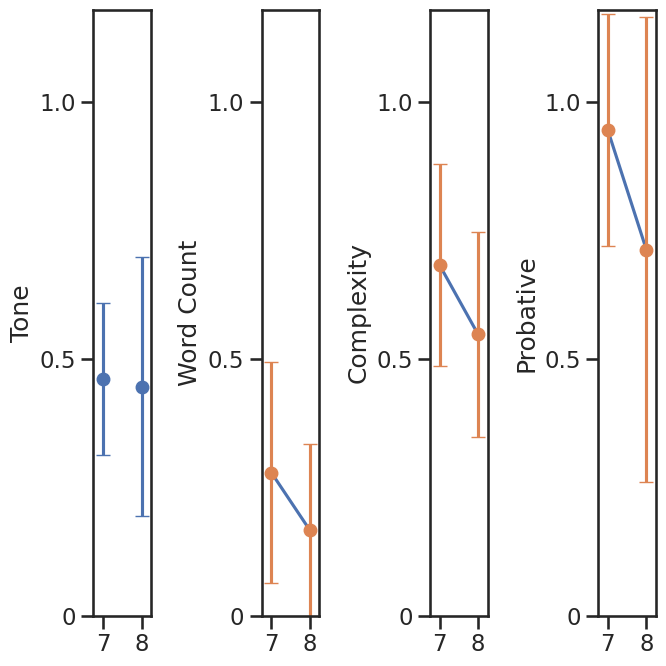

In [35]:
import matplotlib.pyplot as plt
import numpy as np

print('Physics 2 - Section 7 Tone:',data_group2_df['Tone'][8])
print('Physics 2 - Section 7 Tone Standard Deviation:',data_group2_df['Tone_STDEV'][8])
print('Physics 2 - Section 7 Tone Standard Error:',data_group2_df['Tone_STERR'][8])

# Data
x = [data_group2_df['Section'][8], data_group2_df['Section'][9]]
y1 = [data_group2_df['Tone'][8],data_group2_df['Tone'][9]]
y2 = [data_group2_df['Word Count'][8],data_group2_df['Word Count'][9]]
y3 = [data_group2_df['Complexity'][8],data_group2_df['Complexity'][9]]
y4 = [data_group2_df['Probative'][8],data_group2_df['Probative'][9]]

# Error bars
yerr1 = [data_group2_df['Tone_STDEV'][8],data_group2_df['Tone_STDEV'][9]]
yerr2 = [data_group2_df['WC_STDEV'][8],data_group2_df['WC_STDEV'][9]]
yerr3 = [data_group2_df['Complexity_STDEV'][8],data_group2_df['Complexity_STDEV'][9]]
yerr4 = [data_group2_df['Probative_STDEV'][8],data_group2_df['Probative_STDEV'][9]]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 4, figsize=(7, 7))
#plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)

# Plot each subplot
axs[0].errorbar(x, y1, yerr=yerr1, fmt='o', capsize=5)
axs[0].set_xlim(26.75, 28.25)
axs[0].set_ylim(0.0, 1.18)
axs[0].set_xticks([27,28], ['7', '8'])
axs[0].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[0].set_ylabel('Tone')

axs[1].plot(x, y2)
axs[1].errorbar(x, y2, yerr=yerr2, fmt='o', capsize=5)
axs[1].set_xlim(26.75, 28.25)
axs[1].set_ylim(0.0, 1.18)
axs[1].set_xticks([27,28], ['7', '8'])
axs[1].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[1].set_ylabel('Word Count')

axs[2].plot(x, y3)
axs[2].errorbar(x, y3, yerr=yerr3, fmt='o', capsize=5)
axs[2].set_xlim(26.75, 28.25)
axs[2].set_ylim(0.0, 1.18)
axs[2].set_xticks([27,28], ['7', '8'])
axs[2].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[2].set_ylabel('Complexity')

axs[3].plot(x, y4)
axs[3].errorbar(x, y4, yerr=yerr4, fmt='o', capsize=5)
axs[3].set_xlim(26.75, 28.25)
axs[3].set_ylim(0.0, 1.18)
axs[3].set_xticks([27,28], ['7', '8'])
axs[3].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[3].set_ylabel('Probative')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

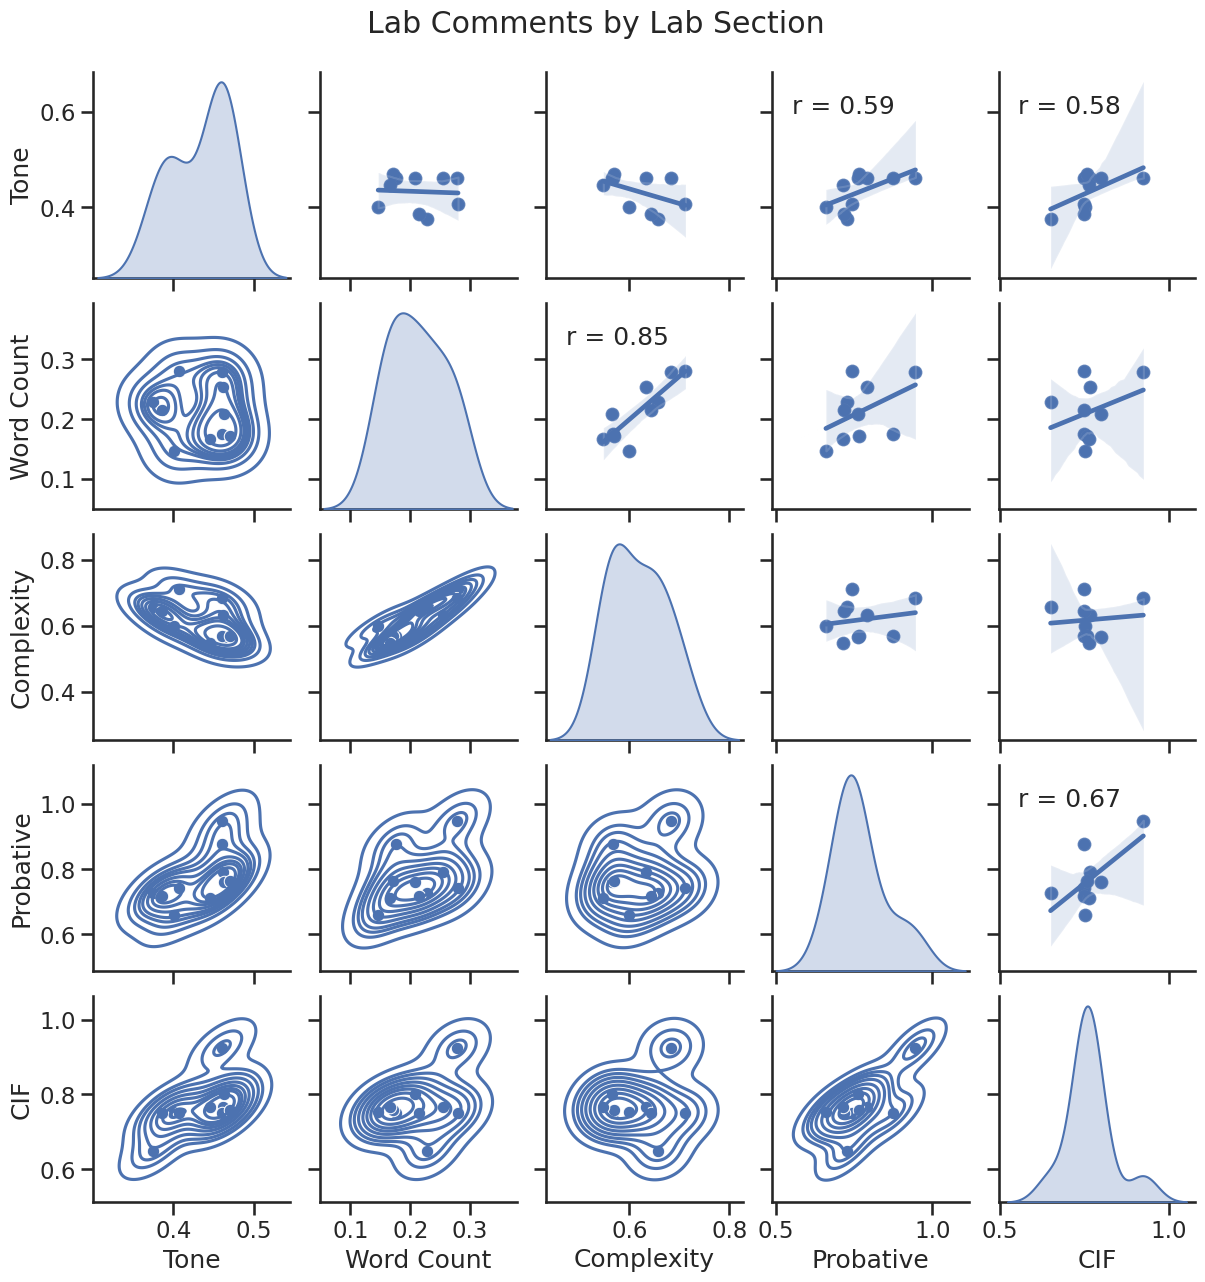

In [37]:
sns.set_context('talk')

data_cifs_sub = data_group2_df[['Tone','Word Count','Complexity','Probative','CIF']]

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    if p < 0.1:
      ax = plt.gca()
      ax.annotate("r = {:.2f}".format(r), xy=(0.1, .8), xycoords=ax.transAxes)
      # ax.annotate("p = {:.2f}".format(p), xy=(0.1, .7), xycoords=ax.transAxes)
    else:
      return()

g = sns.pairplot(data_cifs_sub[['Tone','Word Count','Complexity','Probative','CIF']], diag_kind="kde")
g.fig.suptitle('Lab Comments by Lab Section', y=1.03)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_upper(corrfunc)
#

plt.savefig('Potentially_Predicting_CIFs.png')